# Task 2 Prediction using Unsupervised ML

### following are the neccessary packages for the task

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.cluster import KMeans,Birch,DBSCAN,AffinityPropagation,OPTICS
import matplotlib.pyplot as plt
import numpy as np

## 1)data importing with pandas

In [20]:
data2=pd.read_csv('C:\\Users\\nsudh\\Desktop\\Spark-intership\\Iris.csv')
data2

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## 2) checking for outliers


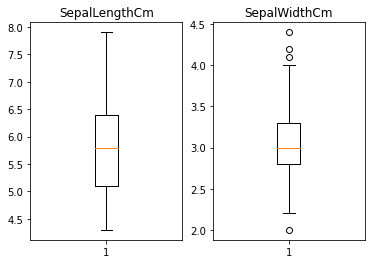

In [21]:
figr,axr =  plt.subplots(1,2)
axr[0].boxplot(data2['SepalLengthCm'])
axr[1].boxplot(data2['SepalWidthCm'])
axr[0].set_title('SepalLengthCm')
axr[1].set_title('SepalWidthCm')
plt.show()

***outliers exists in SepalWidthCm***

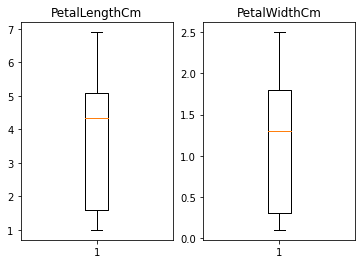

In [22]:
figr,axr =  plt.subplots(1,2)
axr[0].boxplot(data2['PetalLengthCm'])
axr[1].boxplot(data2['PetalWidthCm'])
axr[0].set_title('PetalLengthCm')
axr[1].set_title('PetalWidthCm')
plt.show()

***removing outliers***

In [23]:
q1cl=data2['SepalWidthCm'].quantile(0.25)
q3cl=data2['SepalWidthCm'].quantile(0.75)
iqrcl=q3cl-q1cl
mincl=q1cl-(1*iqrcl)
maxcl=q3cl+(1*iqrcl)
print(mincl,maxcl)

2.3 3.8


In [24]:
data2=data2[data2['SepalWidthCm']>=mincl]
data2=data2[data2['SepalWidthCm']<=maxcl]
data2

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


***after removing outliers***

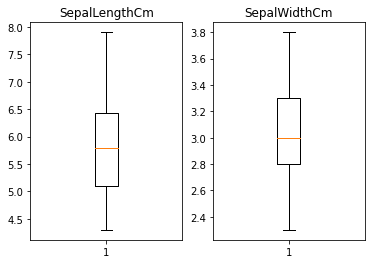

In [25]:
figr,axr =  plt.subplots(1,2)
axr[0].boxplot(data2['SepalLengthCm'])
axr[1].boxplot(data2['SepalWidthCm'])
axr[0].set_title('SepalLengthCm')
axr[1].set_title('SepalWidthCm')
plt.show()

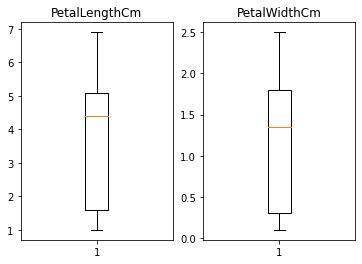

In [26]:
figr,axr =  plt.subplots(1,2)
axr[0].boxplot(data2['PetalLengthCm'])
axr[1].boxplot(data2['PetalWidthCm'])
axr[0].set_title('PetalLengthCm')
axr[1].set_title('PetalWidthCm')
plt.show()

In [27]:
data2['Species'].unique() #all unique cluster names

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## 3) making dependent and independent values


In [28]:
xcl=data2.iloc[:,1:-1].values
ycl=data2.iloc[:,-1:].values
xcl

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [4.9, 3.1, 1.5, 0.1],
       [5. , 3.2, 1.2, 0.2],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [4.4, 3. , 1.3, 0.2],
       [5.1, 3.4, 1.5, 0.2],
       [5. , 3

## 4) creating and fitting KMEANS clusters model

In [29]:
clus1=KMeans(n_clusters=3,random_state=1).fit(xcl)
clus1


KMeans(n_clusters=3, random_state=1)

***the optimal number of clusters are 3***

## 5) coloring the predicted clusters

In [30]:
data2['clus']=clus1.predict(xcl)
data2['color']=data2.clus.map({0:'red',1:'yellow',2:'blue'})
data2

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,clus,color
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1,yellow
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1,yellow
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1,yellow
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1,yellow
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1,yellow
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2,blue
146,147,6.3,2.5,5.0,1.9,Iris-virginica,0,red
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2,blue
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2,blue


## 6) 3d graphical represtation of the clusters

### graph for SepalLengthCm SepalWidthCm PetalLengthCm

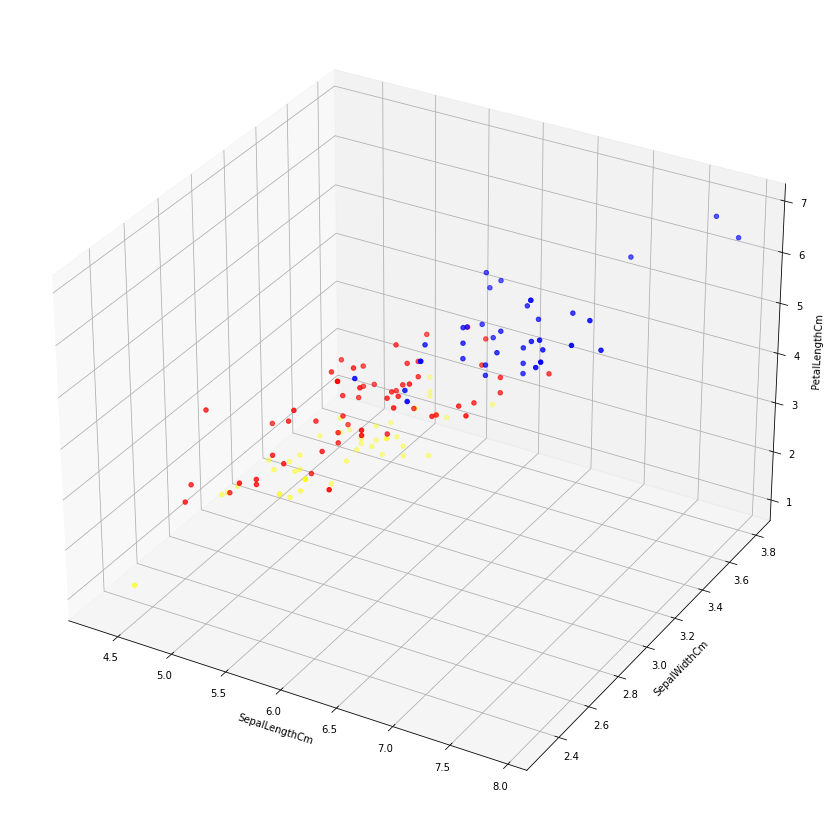

In [31]:
figcl=plt.figure(figsize=(21,15))
axcl=plt.axes(projection='3d')
axcl.scatter(data2['SepalLengthCm'],data2['SepalWidthCm'],data2['PetalLengthCm'],c=data2.color)
axcl.set_xlabel('SepalLengthCm')
axcl.set_ylabel('SepalWidthCm')
axcl.set_zlabel('PetalLengthCm')
plt.show()

### graph for SepalLengthCm SepalWidthCm PetalWidthCm


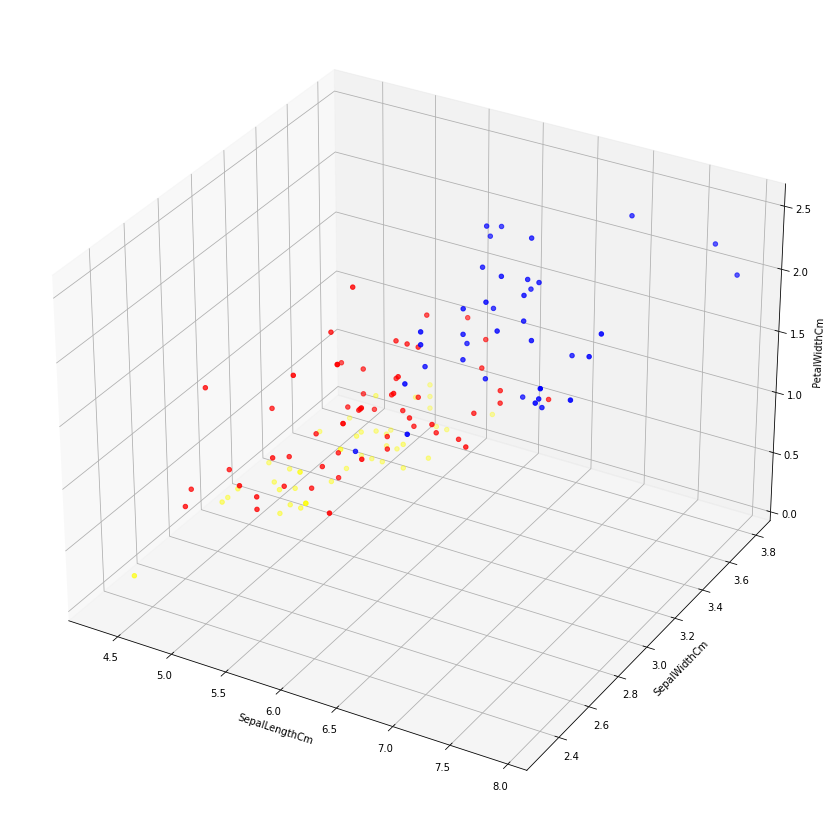

In [32]:
figcl=plt.figure(figsize=(21,15))
axcl=plt.axes(projection='3d')
axcl.scatter(data2['SepalLengthCm'],data2['SepalWidthCm'],data2['PetalWidthCm'],c=data2.color)
axcl.set_xlabel('SepalLengthCm')
axcl.set_ylabel('SepalWidthCm')
axcl.set_zlabel('PetalWidthCm')
plt.show()

### graph for PetalWidthCm SepalWidthCm PetalLengthCm  


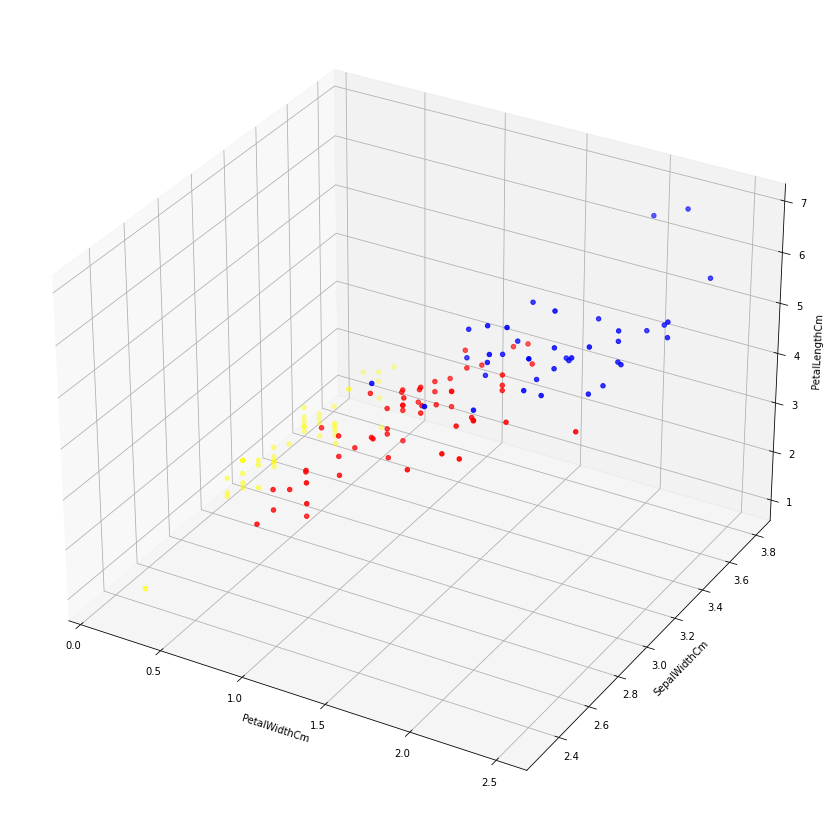

In [33]:
figcl=plt.figure(figsize=(21,15))
axcl=plt.axes(projection='3d')
axcl.scatter(data2['PetalWidthCm'],data2['SepalWidthCm'],data2['PetalLengthCm'],c=data2.color)
axcl.set_xlabel('PetalWidthCm')
axcl.set_ylabel('SepalWidthCm')
axcl.set_zlabel('PetalLengthCm')
plt.show()